# 2018 Fantasy Football statistics (through 10 weeks)

### Import Pandas, NumPy, and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading/Exploring the data

Load the fantasy-football-leaders.csv file  and read the `fantasy-football-leaders.csv` dataset into an object named `ffl`. Take a minute to familiarize yourself with the data.

In [2]:
ffl = pd.read_csv('fantasy-football-leaders.csv')
adp = pd.read_csv('fantasy-football-ppr-adp-rankings.csv')

In [3]:
adp.head()

,Rank,PlayerID,Name,Team,ByeWeek,Age,Position,PositionRank,FantasyPointsPPR,AverageDraftPositionPPR
0,1,16771,Todd Gurley,LAR,12.0,24.0,RB,RB1,340.1,1.3
1,2,14967,Le'Veon Bell,PIT,7.0,26.0,RB,RB2,327.0,3.1
2,3,16847,David Johnson,ARI,9.0,26.0,RB,RB3,320.5,3.3
3,4,17923,Ezekiel Elliott,DAL,8.0,23.0,RB,RB4,305.6,4.6
4,5,11056,Antonio Brown,PIT,7.0,30.0,WR,WR1,323.3,4.7


In [4]:
ffl.head()

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,18890,Patrick Mahomes,KC,QB,10,3150,31,7,158,2,0,0,0,0.0,0,0,0,26.4,263.80
1,2,16771,Todd Gurley,LAR,RB,10,0,0,0,988,13,40,402,4,0.0,0,0,0,24.5,245.00
2,3,7242,Drew Brees,NO,QB,10,2964,25,1,28,3,1,1,0,0.0,0,0,0,23.9,239.46
3,4,732,Matt Ryan,ATL,QB,10,3306,22,4,81,2,0,0,0,0.0,0,0,0,23.2,232.34
4,5,13320,Cam Newton,CAR,QB,10,2443,20,6,354,4,0,0,0,0.0,0,0,0,22.9,229.12


In [5]:
ffl.shape

(300, 20)

In [6]:
ffl.columns

Index(['Rank', 'PlayerID', 'Name', 'Team', 'Position', 'Played',
       'PassingYards', 'PassingTouchdowns', 'PassingInterceptions',
       'RushingYards', 'RushingTouchdowns', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Sacks', 'Interceptions', 'FumblesForced',
       'FumblesRecovered', 'FantasyPointsPerGame', 'FantasyPoints'],
      dtype='object')

In [7]:
ffl.dtypes

Rank                      int64
PlayerID                  int64
Name                     object
Team                     object
Position                 object
Played                    int64
PassingYards              int64
PassingTouchdowns         int64
PassingInterceptions      int64
RushingYards              int64
RushingTouchdowns         int64
Receptions                int64
ReceivingYards            int64
ReceivingTouchdowns       int64
Sacks                   float64
Interceptions             int64
FumblesForced             int64
FumblesRecovered          int64
FantasyPointsPerGame    float64
FantasyPoints           float64
dtype: object

How many different positions are in this dataset?

In [8]:
ffl['Position'].nunique()

17

In [9]:
list(ffl['Position'].unique())

['QB',
 'RB',
 'WR',
 'OLB',
 'DST',
 'DT',
 'TE',
 'DE',
 'K',
 'ILB',
 'SS',
 'FS',
 'S',
 'CB',
 'DB',
 'LB',
 'NT']

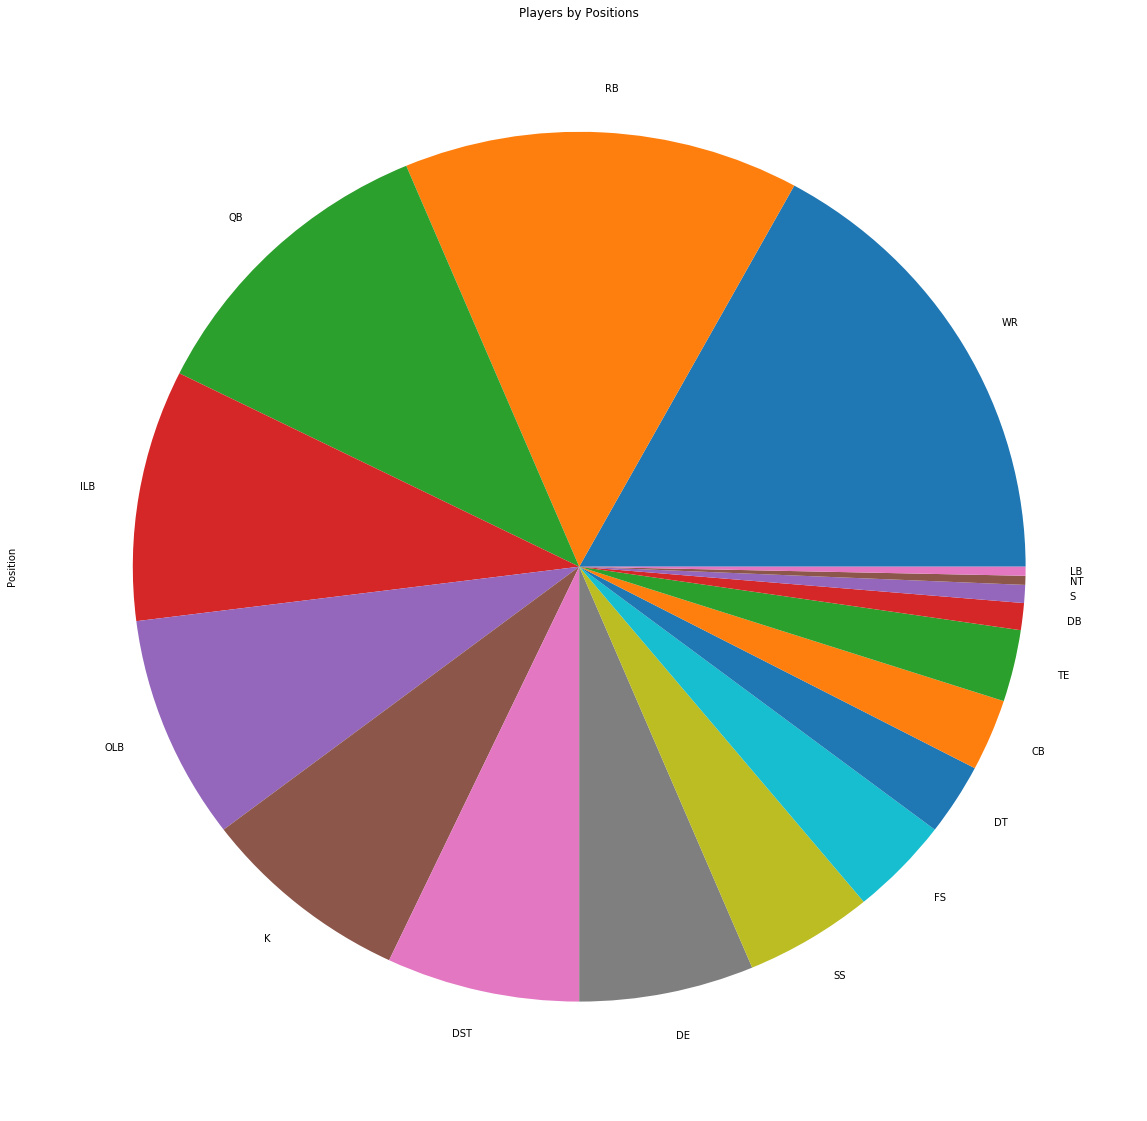

In [10]:
ffl['Position'].value_counts().plot(kind='pie', figsize=(20,20))
plt.title('Players by Positions');

## Hypothesis

My hypothesis is based on a draft strategy called zero RB strategy. What is simply means is that teams do not draft a running back in the early rounds of their draft, instead picking wide recievers or quaterbacks. From this strategy, one can infer that the premier running backs are no longer a premium and that people can draft a top tier wide receiver instead with their first or second pick. Also, the NFL has certainly becoming a pass happy league, as they want more points scored. My hypothesis is the best WRs in fantasy football score more than the best running backs in fantasy football. 

### Create a dataset which only has QB, RB and WR into a new object named `new_ffl`

In [11]:
new_ffl = ffl[(ffl['Position'] == 'QB') | (ffl['Position'] == 'WR') | (ffl['Position'] == 'RB')]
new_ffl.head()

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,18890,Patrick Mahomes,KC,QB,10,3150,31,7,158,2,0,0,0,0.0,0,0,0,26.4,263.80
1,2,16771,Todd Gurley,LAR,RB,10,0,0,0,988,13,40,402,4,0.0,0,0,0,24.5,245.00
2,3,7242,Drew Brees,NO,QB,10,2964,25,1,28,3,1,1,0,0.0,0,0,0,23.9,239.46
3,4,732,Matt Ryan,ATL,QB,10,3306,22,4,81,2,0,0,0,0.0,0,0,0,23.2,232.34
4,5,13320,Cam Newton,CAR,QB,10,2443,20,6,354,4,0,0,0,0.0,0,0,0,22.9,229.12


#### Display fantasy points scored by QB, RB and WR only

In [12]:
new_ffl.groupby('Position').FantasyPoints.sum()

Position
QB    5417.18
RB    4688.62
WR    4717.40
Name: FantasyPoints, dtype: float64

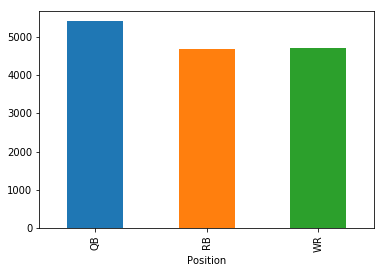

In [13]:
new_ffl.groupby('Position').FantasyPoints.sum().plot(kind='bar')

#### Show the top 30 in a new onbject named `top_30_ffl`

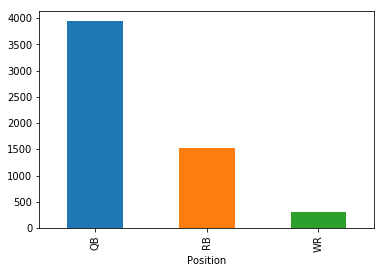

In [14]:
top_30_ffl = new_ffl.sort_values(by='FantasyPoints', ascending=False).head(30)
top_30_ffl.groupby('Position').FantasyPoints.sum().plot(kind='bar')

Show running backs only

In [15]:
ffl_rb = ffl[ffl['Position'] == 'RB']
ffl_rb.head()

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
1,2,16771,Todd Gurley,LAR,RB,10,0,0,0,988,13,40,402,4,0.0,0,0,0,24.5,245.0
10,11,18878,Alvin Kamara,NO,RB,10,0,0,0,617,11,56,510,4,0.0,0,0,0,20.7,206.7
12,13,16776,Melvin Gordon,LAC,RB,9,0,0,0,741,7,42,448,4,0.0,0,0,0,21.0,188.9
13,14,19766,Saquon Barkley,NYG,RB,10,0,0,0,728,7,64,540,3,0.0,0,0,0,18.9,188.8
14,15,18983,James Conner,PIT,RB,10,0,0,0,796,10,45,411,1,0.0,0,0,0,18.9,188.7


Show quarterbacks only

In [16]:
ffl_qb = ffl[ffl['Position'] == 'QB']
ffl_qb.head()

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,18890,Patrick Mahomes,KC,QB,10,3150,31,7,158,2,0,0,0,0.0,0,0,0,26.4,263.80
2,3,7242,Drew Brees,NO,QB,10,2964,25,1,28,3,1,1,0,0.0,0,0,0,23.9,239.46
3,4,732,Matt Ryan,ATL,QB,10,3306,22,4,81,2,0,0,0,0.0,0,0,0,23.2,232.34
4,5,13320,Cam Newton,CAR,QB,10,2443,20,6,354,4,0,0,0,0.0,0,0,0,22.9,229.12
5,6,3807,Ben Roethlisberger,PIT,QB,10,3202,23,10,76,3,1,-1,0,0.0,0,0,0,22.8,227.58


Show wide receivers only

In [17]:
ffl_wr = ffl[ffl['Position'] == 'WR']
ffl_wr.head()

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
28,29,18082,Tyreek Hill,KC,WR,10,0,0,0,81,0,55,891,9,0.0,0,0,0,15.1,151.2
29,30,16470,Davante Adams,GB,WR,10,0,0,0,0,0,72,953,9,0.0,0,0,0,14.9,149.3
30,31,17960,Michael Thomas,NO,WR,10,0,0,0,0,0,82,1042,8,0.0,0,0,0,14.8,148.2
31,32,11056,Antonio Brown,PIT,WR,10,0,0,0,0,0,62,807,11,0.0,0,0,0,14.7,146.7
32,33,15534,Adam Thielen,MIN,WR,10,0,0,0,20,0,85,1013,7,0.0,0,0,0,14.5,145.3


Sort the dataset by most fantasy points scored

In [18]:
ffl.sort_values(by='FantasyPoints', ascending=False)

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,18890,Patrick Mahomes,KC,QB,10,3150,31,7,158,2,0,0,0,0.0,0,0,0,26.4,263.80
1,2,16771,Todd Gurley,LAR,RB,10,0,0,0,988,13,40,402,4,0.0,0,0,0,24.5,245.00
2,3,7242,Drew Brees,NO,QB,10,2964,25,1,28,3,1,1,0,0.0,0,0,0,23.9,239.46
3,4,732,Matt Ryan,ATL,QB,10,3306,22,4,81,2,0,0,0,0.0,0,0,0,23.2,232.34
4,5,13320,Cam Newton,CAR,QB,10,2443,20,6,354,4,0,0,0,0.0,0,0,0,22.9,229.12
5,6,3807,Ben Roethlisberger,PIT,QB,10,3202,23,10,76,3,1,-1,0,0.0,0,0,0,22.8,227.58
6,7,18811,Mitch Trubisky,CHI,QB,10,2469,20,9,363,3,0,0,0,0.0,0,0,0,21.7,217.06
7,8,14008,Andrew Luck,IND,QB,10,2769,29,9,61,0,0,0,0,0.0,0,0,0,21.7,216.86
8,9,17922,Jared Goff,LAR,QB,10,3134,22,6,82,0,0,0,0,0.0,0,0,0,21.6,215.56
9,10,2593,Aaron Rodgers,GB,QB,10,3073,19,1,148,0,0,0,0,0.0,0,0,0,20.8,207.72


## Sort the top 10 in fantasy points for QB, RB and WR

In [19]:
qb_top10 = ffl_qb.sort_values(by='FantasyPoints', ascending=False).head(10)

In [20]:
rb_top10 = ffl_rb.sort_values(by='FantasyPoints', ascending=False).head(10)

In [21]:
wr_top10 = ffl_wr.sort_values(by='FantasyPoints', ascending=False).head(10)

Show only Names, Positions and points scored

In [22]:
new_ffl[['Name', 'Position', 'FantasyPoints']].head(10)

,Name,Position,FantasyPoints
0,Patrick Mahomes,QB,263.80
1,Todd Gurley,RB,245.00
2,Drew Brees,QB,239.46
3,Matt Ryan,QB,232.34
4,Cam Newton,QB,229.12
5,Ben Roethlisberger,QB,227.58
6,Mitch Trubisky,QB,217.06
7,Andrew Luck,QB,216.86
8,Jared Goff,QB,215.56
9,Aaron Rodgers,QB,207.72


## Combine top 10 QB, RB, and WR into one

In [23]:
top_30 = [qb_top10, rb_top10, wr_top10]
final_ffl = pd.concat(top_30)
final_ffl.head()

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,18890,Patrick Mahomes,KC,QB,10,3150,31,7,158,2,0,0,0,0.0,0,0,0,26.4,263.80
2,3,7242,Drew Brees,NO,QB,10,2964,25,1,28,3,1,1,0,0.0,0,0,0,23.9,239.46
3,4,732,Matt Ryan,ATL,QB,10,3306,22,4,81,2,0,0,0,0.0,0,0,0,23.2,232.34
4,5,13320,Cam Newton,CAR,QB,10,2443,20,6,354,4,0,0,0,0.0,0,0,0,22.9,229.12
5,6,3807,Ben Roethlisberger,PIT,QB,10,3202,23,10,76,3,1,-1,0,0.0,0,0,0,22.8,227.58


In [24]:
final_ffl.sort_values(by='FantasyPoints', ascending=False)

,Rank,PlayerID,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,18890,Patrick Mahomes,KC,QB,10,3150,31,7,158,2,0,0,0,0.0,0,0,0,26.4,263.80
1,2,16771,Todd Gurley,LAR,RB,10,0,0,0,988,13,40,402,4,0.0,0,0,0,24.5,245.00
2,3,7242,Drew Brees,NO,QB,10,2964,25,1,28,3,1,1,0,0.0,0,0,0,23.9,239.46
3,4,732,Matt Ryan,ATL,QB,10,3306,22,4,81,2,0,0,0,0.0,0,0,0,23.2,232.34
4,5,13320,Cam Newton,CAR,QB,10,2443,20,6,354,4,0,0,0,0.0,0,0,0,22.9,229.12
5,6,3807,Ben Roethlisberger,PIT,QB,10,3202,23,10,76,3,1,-1,0,0.0,0,0,0,22.8,227.58
6,7,18811,Mitch Trubisky,CHI,QB,10,2469,20,9,363,3,0,0,0,0.0,0,0,0,21.7,217.06
7,8,14008,Andrew Luck,IND,QB,10,2769,29,9,61,0,0,0,0,0.0,0,0,0,21.7,216.86
8,9,17922,Jared Goff,LAR,QB,10,3134,22,6,82,0,0,0,0,0.0,0,0,0,21.6,215.56
9,10,2593,Aaron Rodgers,GB,QB,10,3073,19,1,148,0,0,0,0,0.0,0,0,0,20.8,207.72


In [25]:
final_ffl.groupby('Position').FantasyPoints.sum()

Position
QB    2247.50
RB    1810.40
WR    1384.78
Name: FantasyPoints, dtype: float64

Text(0.5,1,'Fantasy Points by Position')

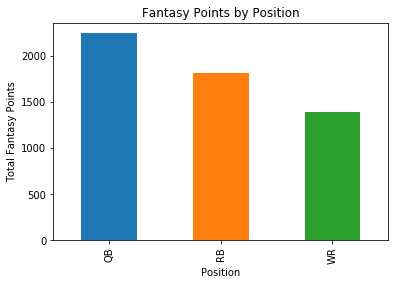

In [26]:
final_ffl.groupby('Position').FantasyPoints.sum().plot(kind='bar')
plt.ylabel('Total Fantasy Points')
plt.xlabel('Position')
plt.title('Fantasy Points by Position')

In [27]:
df1 = new_ffl[['PlayerID','Name', 'Position', 'FantasyPoints']]
df2 = adp[['PlayerID','AverageDraftPositionPPR']]
combined_ffl = df1.merge(df2, on = 'PlayerID')
combined_ffl.rename(index=str, columns={'AverageDraftPositionPPR': 'ADP'}, inplace=True)
combined_ffl['ADP'].fillna(0, inplace=True)
combined_ffl.head()

,PlayerID,Name,Position,FantasyPoints,ADP
0,18890,Patrick Mahomes,QB,263.80,119.0
1,16771,Todd Gurley,RB,245.00,1.3
2,7242,Drew Brees,QB,239.46,65.9
3,732,Matt Ryan,QB,232.34,108.8
4,13320,Cam Newton,QB,229.12,69.4


### Create a new column that breaks down the position players into tiers based on the fantasy points they scored

In [28]:
def tier_placement(FantasyPoints):
    if FantasyPoints >= 190:
        return '1'
    if FantasyPoints >= 115:
        return '2'
    if FantasyPoints >= 90:
        return '3'
    if FantasyPoints >= 60:
        return '4'

In [29]:
combined_ffl['Tiers'] = combined_ffl['FantasyPoints'].apply(tier_placement)
combined_ffl.head()

,PlayerID,Name,Position,FantasyPoints,ADP,Tiers
0,18890,Patrick Mahomes,QB,263.80,119.0,1
1,16771,Todd Gurley,RB,245.00,1.3,1
2,7242,Drew Brees,QB,239.46,65.9,1
3,732,Matt Ryan,QB,232.34,108.8,1
4,13320,Cam Newton,QB,229.12,69.4,1


# Conclusion

As popular of a draft strategy the "zero rb strategy" is, the running back position is still the most important player to draft in the early rounds of fantasy football. As shown above, overall WRs score just about, if not more than RBs, but if you took the top 10 RB against the top 10 WR, the RBs score more. As for the QB position, despite them outscoring RB and WR, they are not as important in fantasy football because, all the top 10 QB were all drafted outside of the first 2 rounds. The top scorer in fantasy football overall went undrafted in most leagues.

# Next...

I plan on revisiting this data when the season is over and would like to compare Week 10 to a full season and see if the numbers still hold true. Also, I would like to take this research a little further and see what else I can do with this data. I read alot about touchdown regression models nowadays and would like to see if I can replicate it myself. Also, a popular statistic this year has been "Net Air Yards" and its effect or fantasy point production of receievers. Would love to explore on that as well.